# Introduction

In [1]:
## Load the BPTK Package
from BPTK_Py.bptk import bptk 
bptk = bptk()

In [2]:
scenarios=bptk.reset_all_scenarios()

The competitive pricing model is a generic market simulation model that shows some of the key dynamics that determine prices in competitive markets, i.e. in markets where substitute products are readily available.

The model assumes we are the owner of production facilities that produce and sell a generic product.

It focusses on the flow of product from production into the market and on the price setting mechanisms - it does not consider the details of production, sales or logistics processes. In particular it doesn't explicitly model raw materials, assuming they are abundant.

The model is a generic model that is intended to be used as a starting point for the creation of a more detailed, market and company specific simulation model.

This document first discusses the key feedback loops that determine competitive dynamics and illustrates their effect.

It then discusses the results of a "market shock" scenario, before discussing the underlying stock and flow model and its equations in detail.

# Competitive Pricing Dynamics

The following causal loop diagram shows some of the key dynamics that determine prices in competitive markets.

![Competitive Pricing Dynamics](images/cld_competitive_pricing.svg)

The diagram consists of six loops, the first five of which are _balancing loops_  and the last of which is a _reinforcing loop_:

* _Availability._ The inventory is a measure of the amount of product available for consumption. The availability loop aligns the consumption rate to the inventory, ensuring that inventory is depleted upon consumption and that consumption is constrained by the available inventory.
* _Capacity utilization._ The production rate determines how many units of our product are producted per timestep. It depends on the production capacity (i.e. how much can we produce) and the capacity utilization (i.e. which percentage of our capacity are we actively using). The capacity utilization loop ensures that the production rate is adjusted according to the expected profitability (and thus indirectly to market demand).
* _Capacity acquisition._ In some cases, production capacity may not be large enough to meet demands. The capacity acquisition loop ensures that new production capacity is created if necessary.
* _Substitution._ In competitive markets, consumers will find substitutes for our product if the price is set too high. This loop captures the dynamics of how prices align within a market.
* _Cost pressure._ This loop ensures that these costs of production are reflected in the price of the product, i.e. that we cover our costs.
* _Price adjustment._ This loop models the price setting process, ensuring that the actual price reflects both the priced expected due to past experience and the indicated price that ensures we cover our costs. This is a reinforcing loop, because if prices rise then so do our expectations.

The following sections discuss each loop in more detail and illustrate their behaviour in isolation from the other loops. 

## Availability

Inventory is a measure for the amount of product readily available in the market. If the consumption rate increases, the inventory will decline, if all else remains the same. The consumption rate also depends on inventory, because nothing cone be consumed if there is no inventory.

The graph below shows this mechanism:

* demand increases from 100 to 150 at time 10 (the simulation runs over 60 timesteps, e.g. months).
* Inventory quickly drops to 100, because our production rate is only at 100.
* Inventory then stays at 100, because the consumption rate is constrained by the availability loop - despite the higher demand, consumption cannot be higher then the available inventory, so effectively the consumption rate is bound to the production rate.

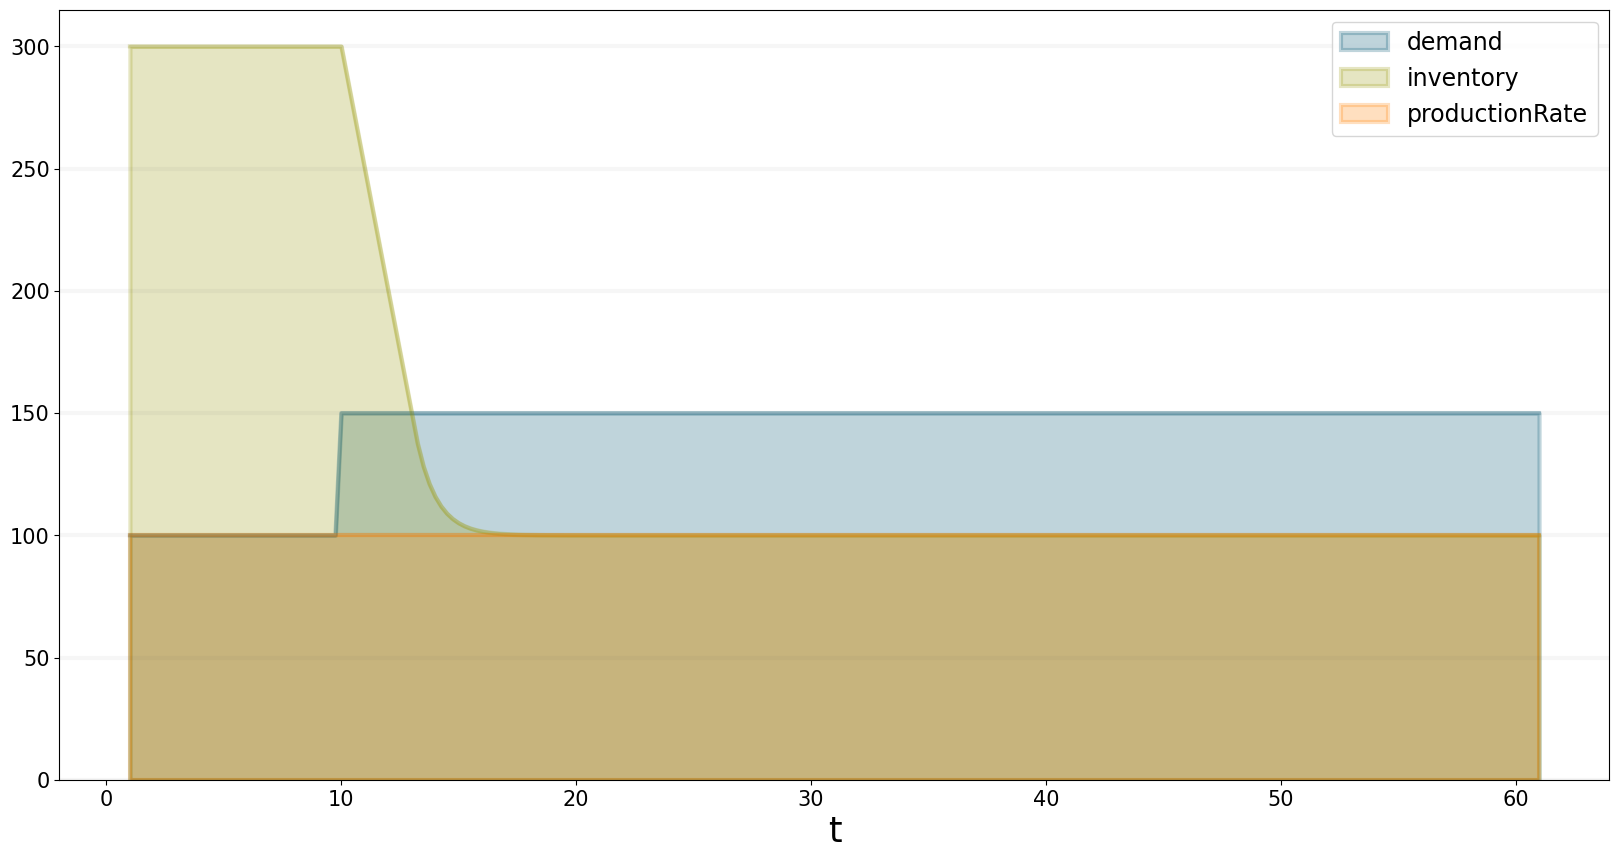

In [3]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["availabilityLoop"], 
            equations=["demand","inventory","productionRate"]
            )

The graph below shows how consumption rate adjusts to inventory.

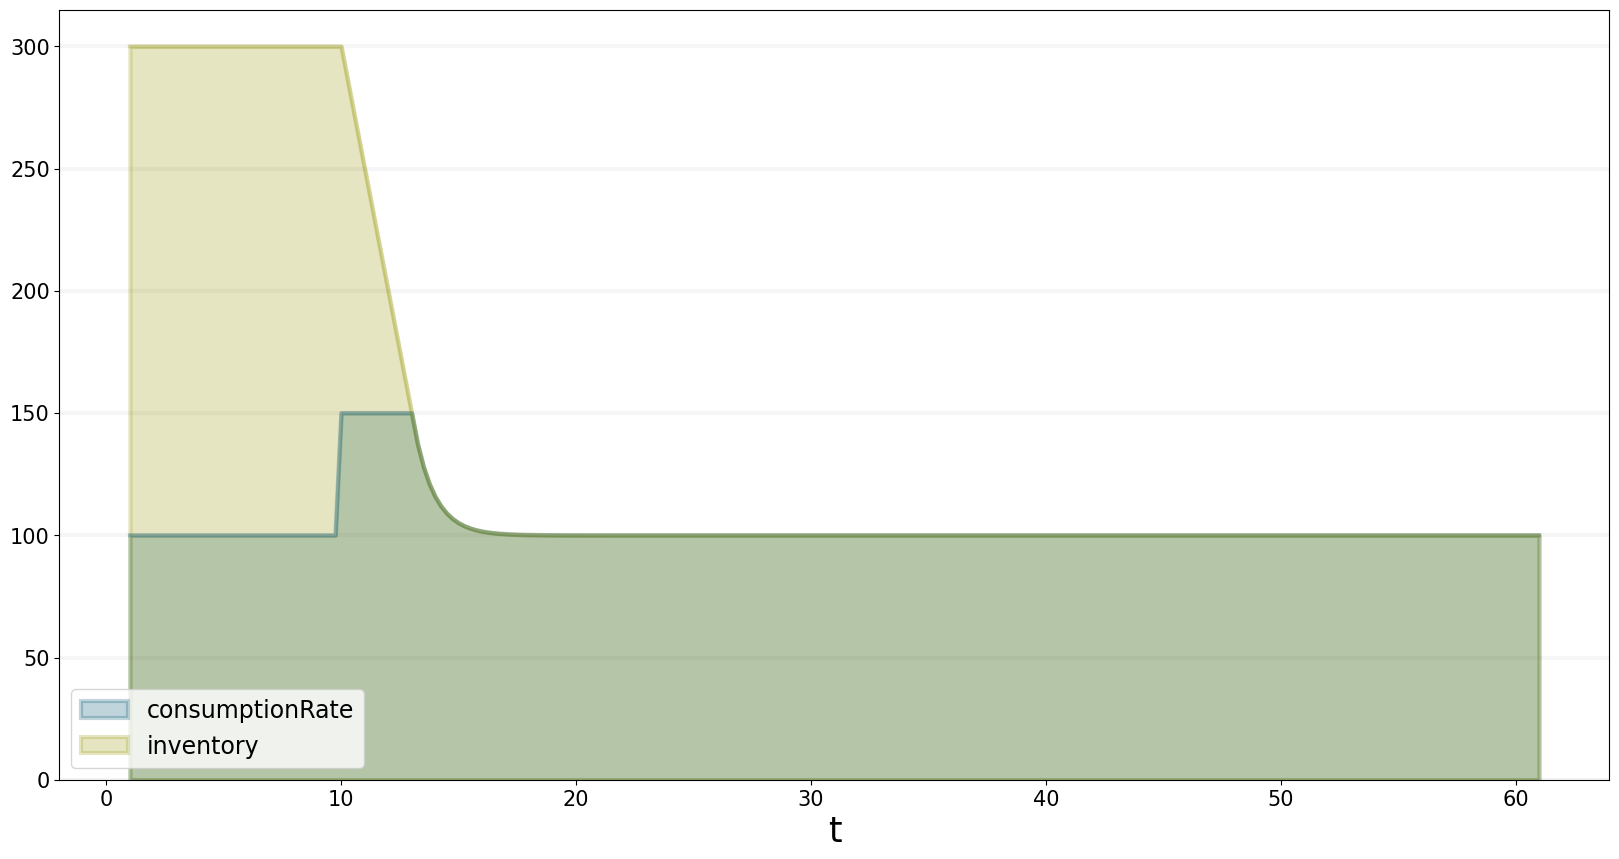

In [4]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["availabilityLoop"], 
            equations=["consumptionRate","inventory"]
            )

## Capacity Utilization

If the price of our products increases, then our expectation regarding profitability will also go up and we will try to utilize the capacity available to us as best we can.

Increasing utilzation increase the production rate, which leads to a higher inventory. The higher inventory increases the inventory coverage, which leads to lower prices.

In sum, this loop ensures that production rate is adjusted according to the profits we can make.

The graph below shows how the price and the expected profitability adjust to the demand peak introduced above - the profitability is normalized relative to the base case.

There is a time lag in profitability expectations, to ensure there is no overreaction to price changes. The time lag assumed here is 12 months.

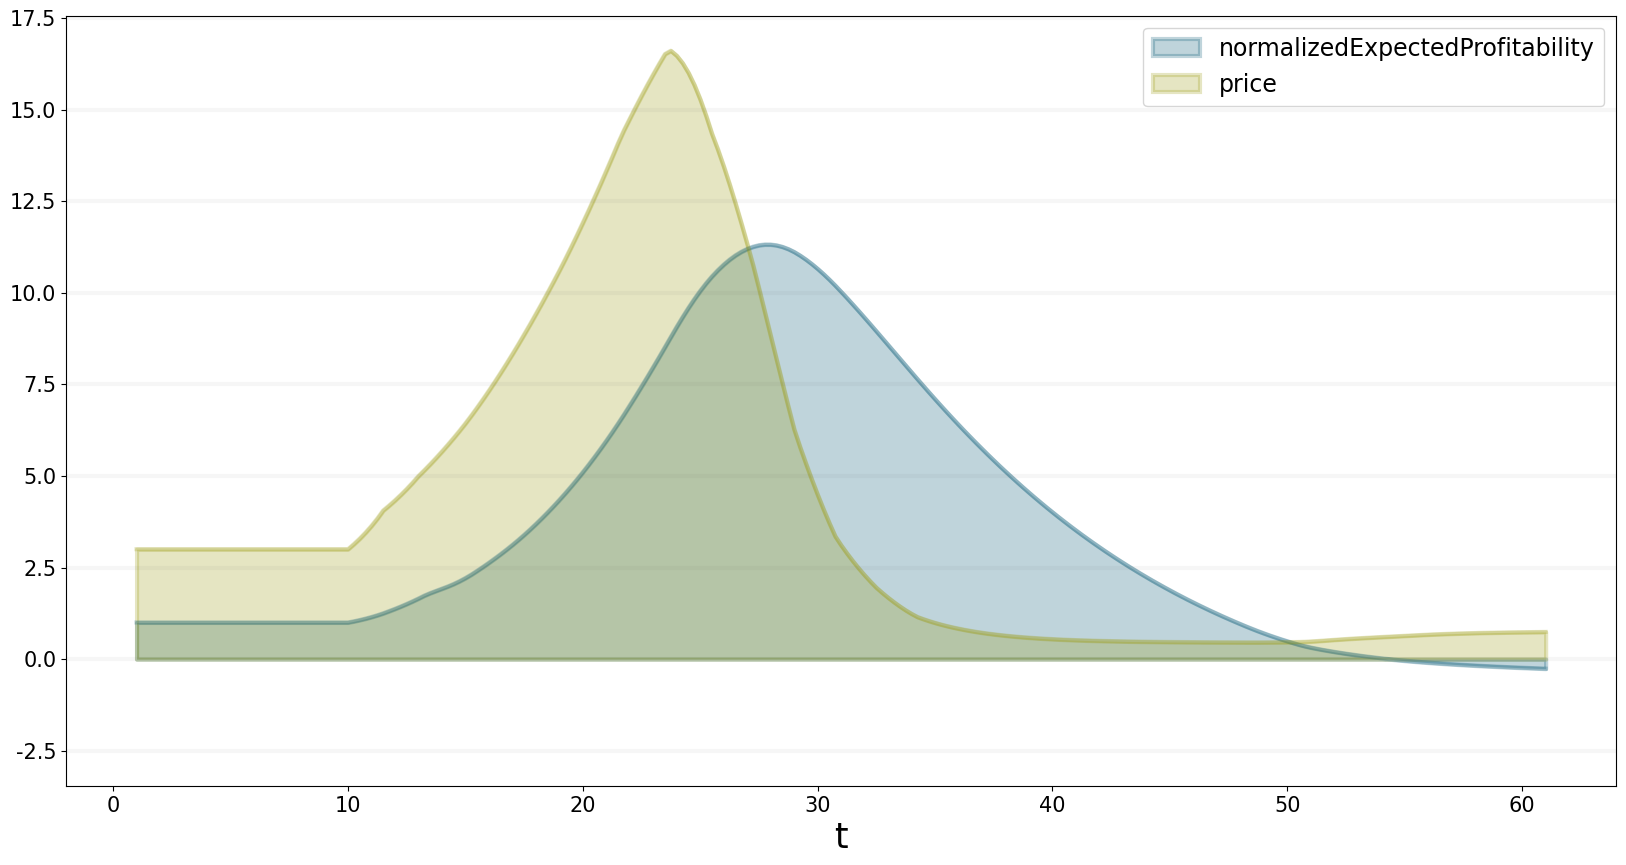

In [5]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["capacityUtilizationLoop"], 
            equations=["normalizedExpectedProfitability","price"]
            )

Because our expected profitability increases, we increase our capacity utilization and thus also our production rate.

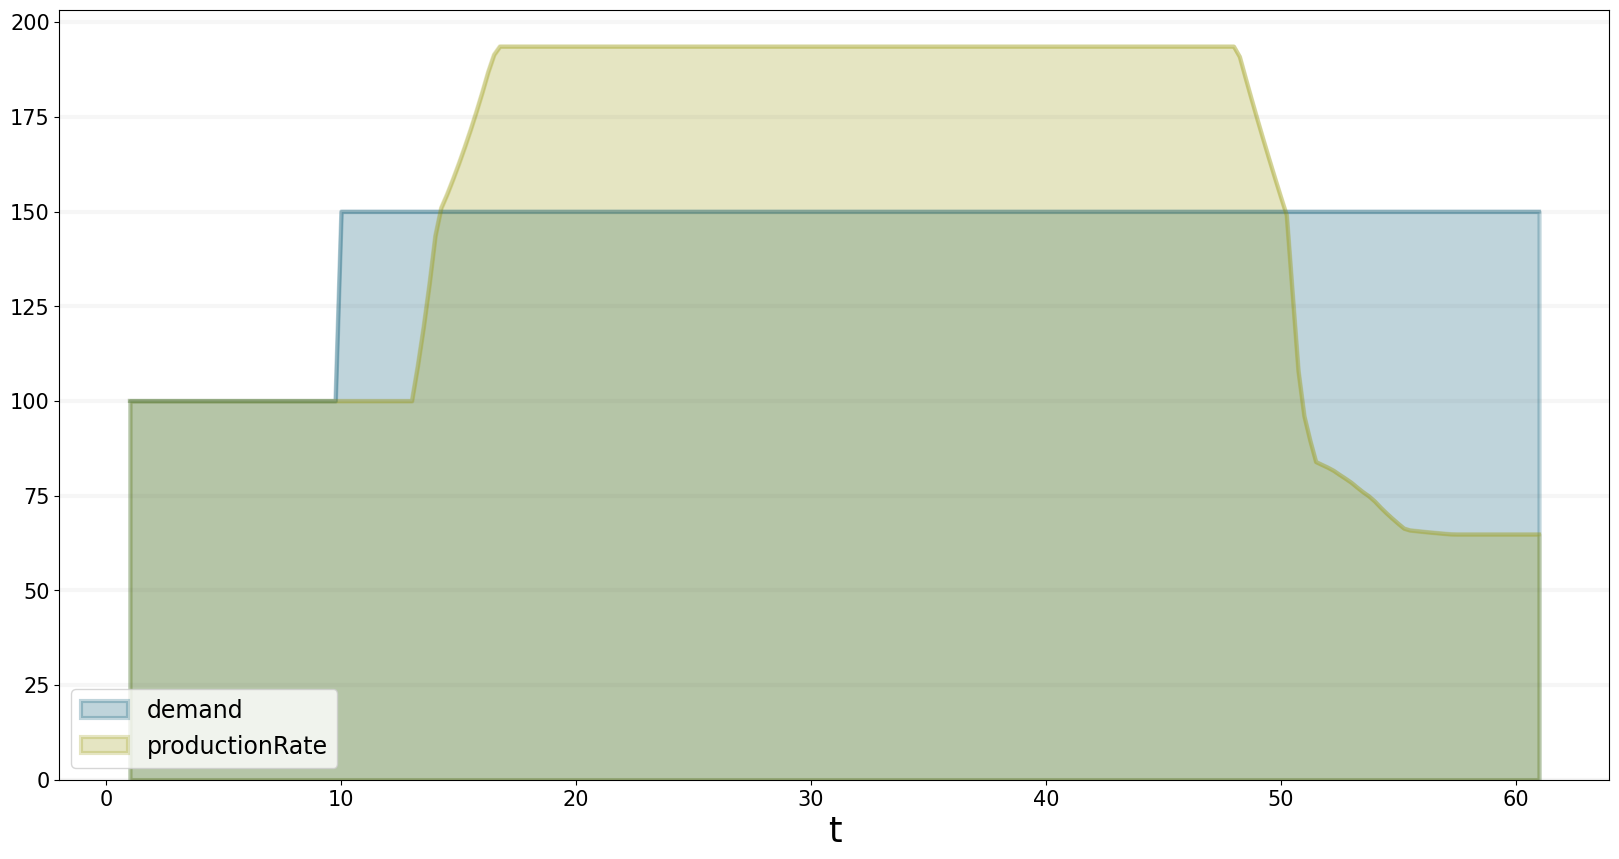

In [6]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["capacityUtilizationLoop"], 
            equations=["demand","productionRate"]
            )

Note that the price drops to a price lower than the initial price in this scenario. This happens because our production rate is very high, leading to overstocking and thus lower prices (don't forget we are looking at this loop in isolation - in a moment we will see that in the full model the demand also increaes due to low prices, which balances the inventory).

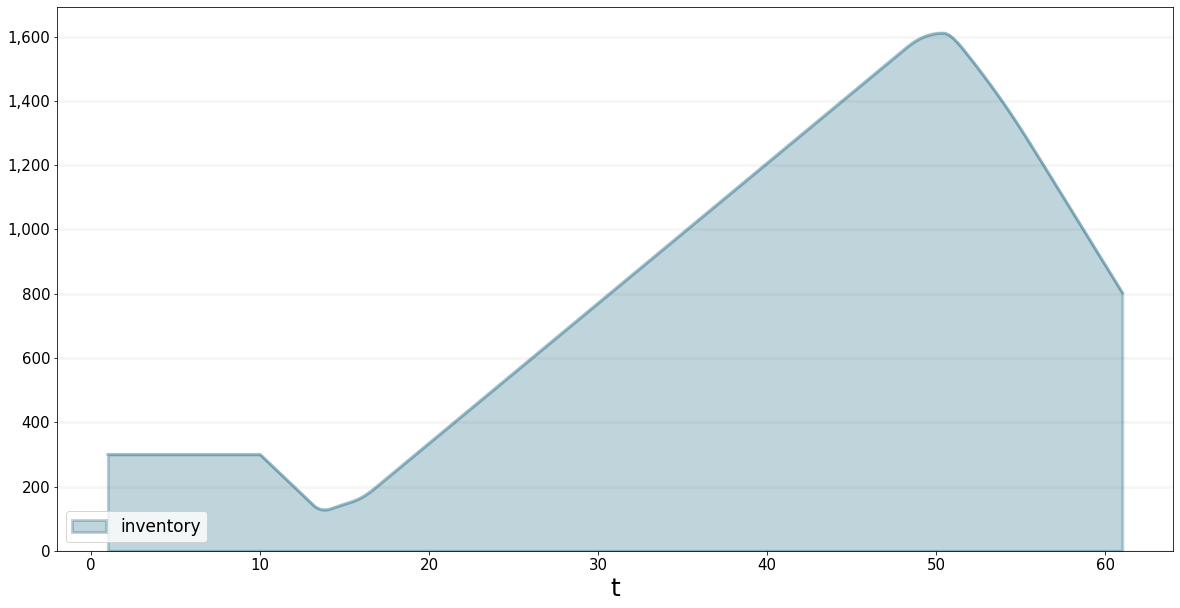

In [7]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["capacityUtilizationLoop"], 
            equations=["inventory"]
            )

Note that in the causal loop diagram above, production rate is determined purely by profit expectations - in reality, we would also strive to keep inventory coverage below a maximum level to minimize storage costs. This would add another feedback loop from inventory to production.

## Capacity Acquisition

If prices go up, we would expect to make even more profit by increasing our production capacity and there we would make (long-term) investments into building production capacity and thus increase our (potential) production rate in the long run. This would lead to a higher inventory converage and thus lower prices, which would ultimately adjust our production capacity to match the price.

Note: Currently the simulation model assumes that available capacity is constant.

## Substitution

Inventory coverage is a measure for how much inventory there is relative to consumption rate. Prices depend on inventory coverage - if coverage goes up, prices will tend to go down and vice versa.

Consumers compare the price of our product to the price of potential substitutes, which are readily available in a competitive market.

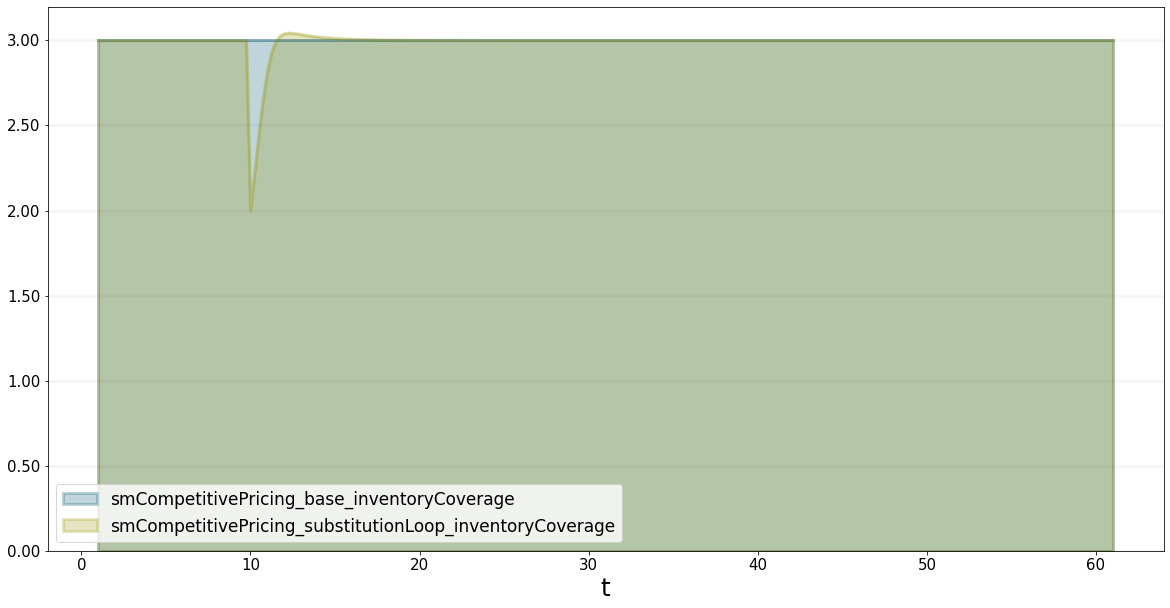

In [8]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base","substitutionLoop"], 
            equations=["inventoryCoverage"]
            )

The market demand for our product depends on the relative value of our product: if our prices are lower than the prices of substitutes, then demand will go up, and vice versa.

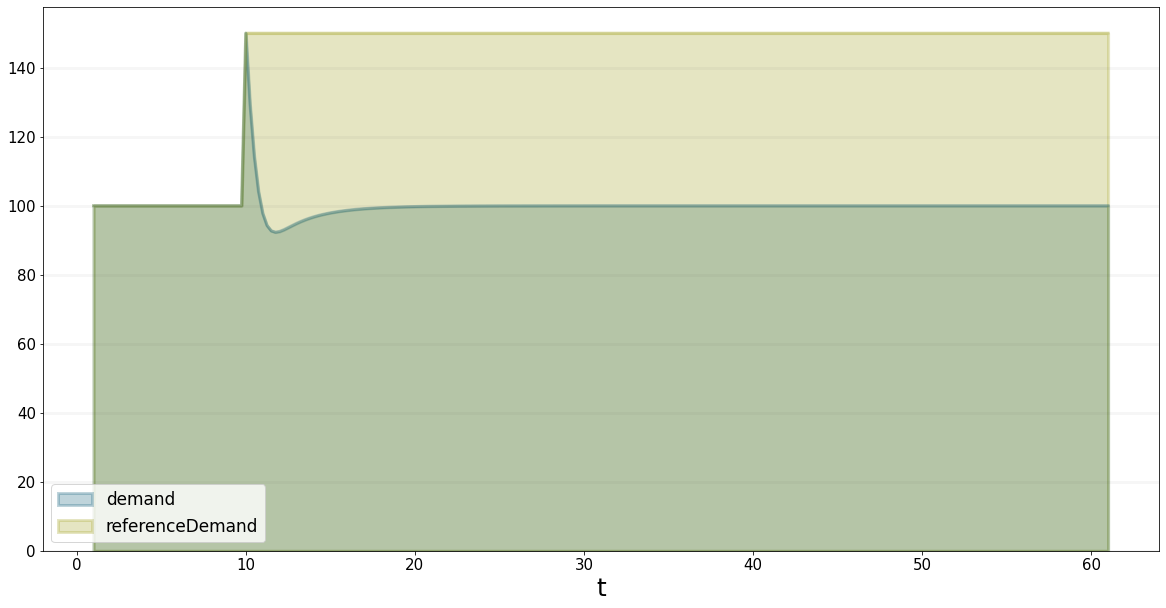

In [9]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["substitutionLoop"], 
            equations=["demand","referenceDemand"]
            )

Note: In a more realistic model, demand will also depend on factors such as purchasing power and social and technical effects, which we do not consider here.

All in all, the substitution loop ensures that prices adjust to demand: if the demand increases, so will our consumption rate, which decreases our inventory coverage. This leads to a higher price, which lowers the relative value and thus the overall demand for our product.

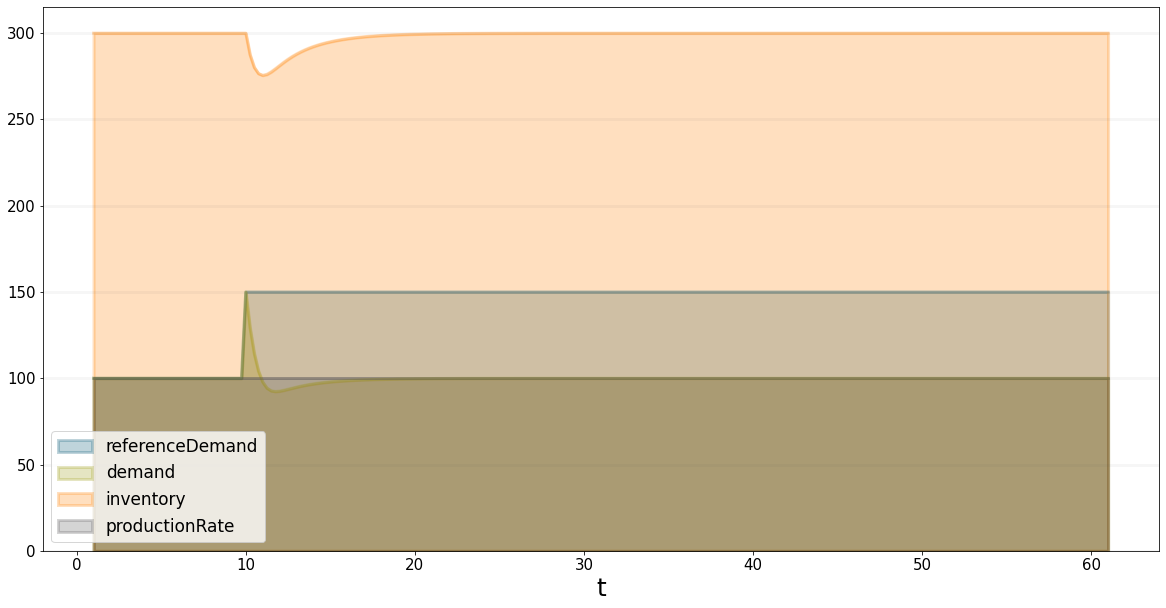

In [10]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["substitutionLoop"], 
            equations=["referenceDemand","demand","inventory","productionRate"]
            )

## Cost Pressure

This loop determines how sensitively changes in costs are reflected in the price and how quickly they are passed on to the market.

Note: currently the simulation model assumes that the cost structure is fixed.

## Price adjustment

This loop ensures that prices match the cost of production, i.e. that our minimum price covers production cost: the indicated prices must not be less then the minimum price needed to avoid losses, but it should also not be less then the price that can be realised in the market.

To ensure the expected price is not completely volatile, it is formed from the history of indicated prices through expontential smoothing. How quickly the expected price adjustes to changes in the market will depend both on industry and company specifics.

The actual price is then equal to the expected price adjusted for the effects of inventory coverage - low inventory coverage leads to higher prices and vice versa.

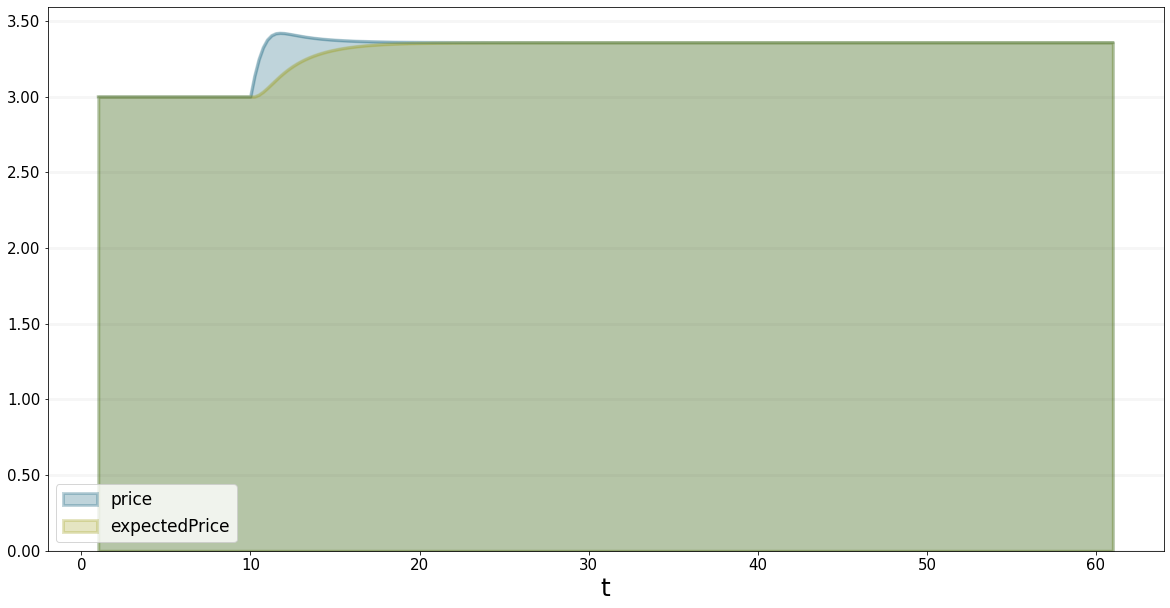

In [11]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["substitutionLoop"], 
            equations=["price","expectedPrice"]
            )

# Scenario Experiments

Now that we have an understanding of each individual loop, we can perform some scenario experiments with the full model and see how prices and demand adjust to external influences.

## Base Case

Let's quickly run through the base case first, which starts the model in equilibrium.

The equilibrium price for our product is set at EUR 3. This is equal to both the indicated price  and the expected price. The minimum price (the amount we need to be profitable) is at EUR 1.5

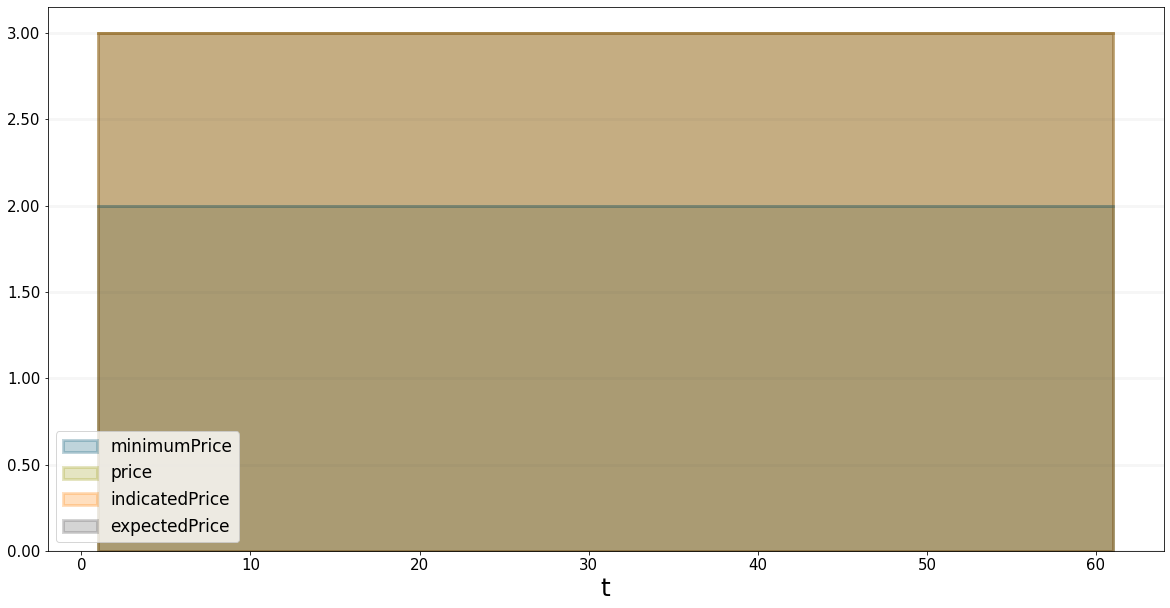

In [12]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base"], 
            equations=["minimumPrice","price","indicatedPrice","expectedPrice"]
            )

Initially there is a reference demand of 100 units per month. Because the market is in equilibrium, the reference demand (i.e. the demand given the equilibrium price) equals the actual demand.

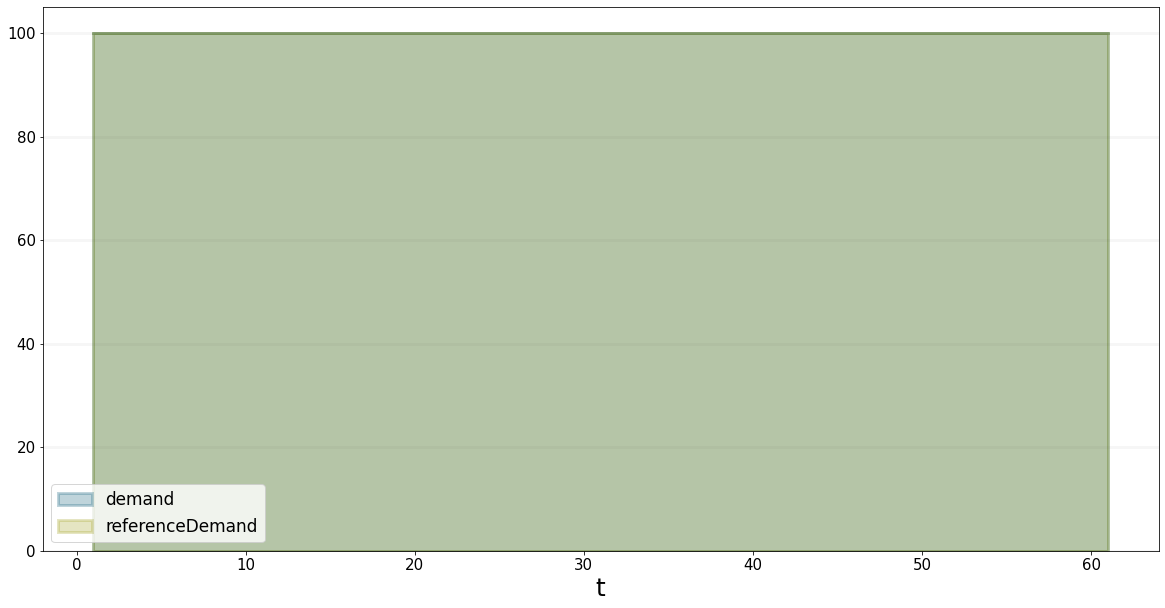

In [13]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base"], 
            equations=["demand","referenceDemand"]
            )

Our production capacity is 200 units per month - but we only produce 100 units per month to avoid overstocking and are thus at a utilization of 50%. 300 units are "work in progress" within production.

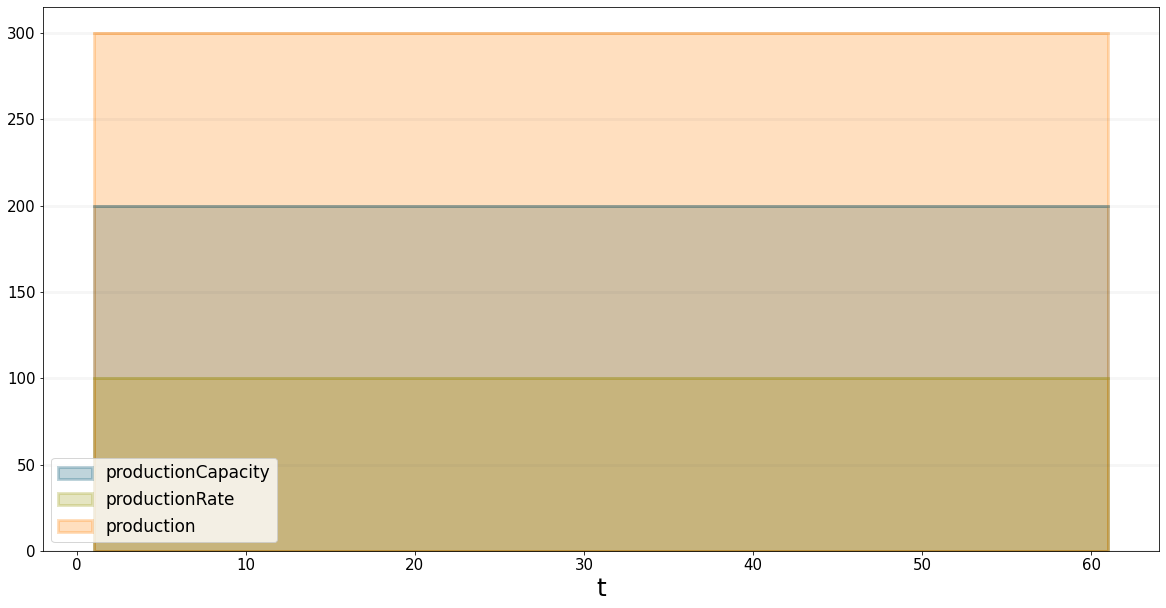

In [14]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base"], 
            equations=["productionCapacity","productionRate","production"]
            )

Capacity utilization is thus at 50%.

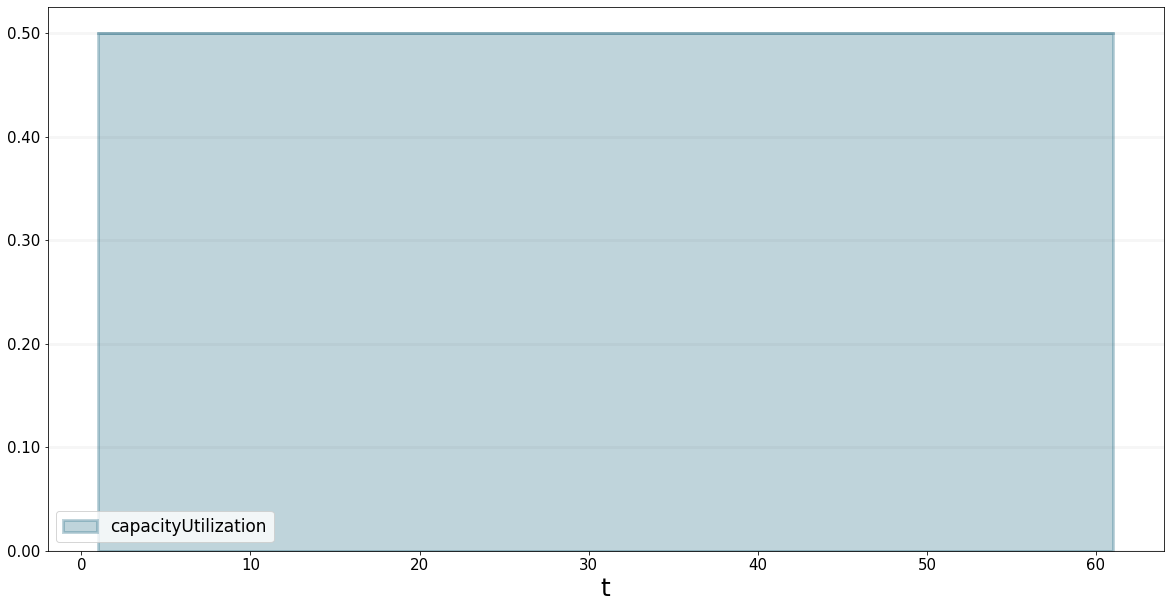

In [15]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base"], 
            equations=["capacityUtilization"]
            )

The inventory is also at 300 and the consumption rate equals the demand, i.e. is at 100.

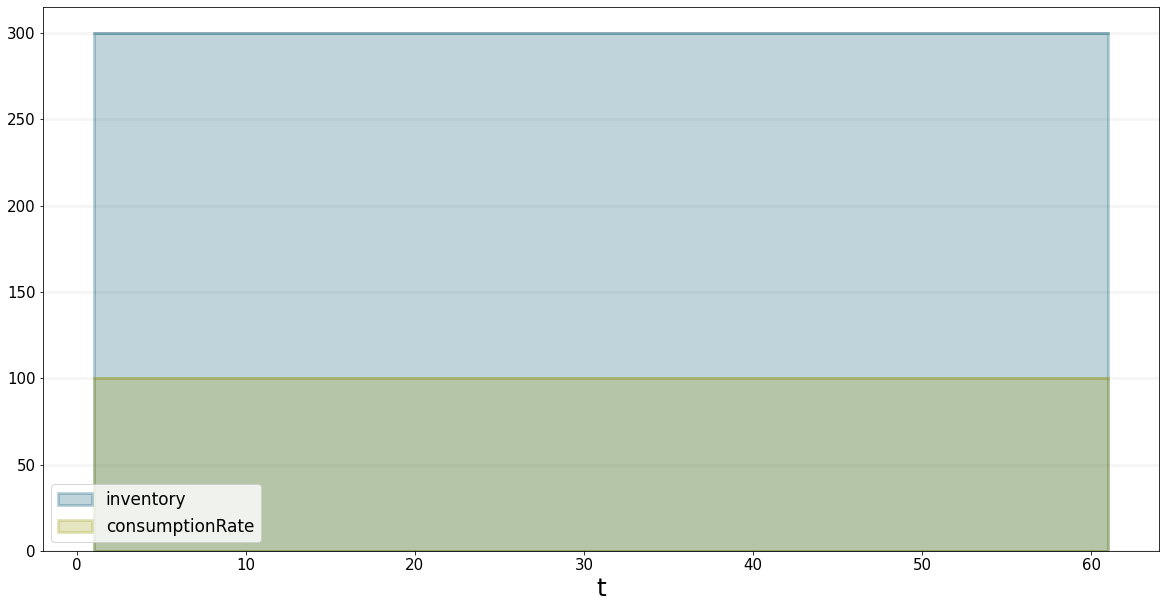

In [16]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base"], 
            equations=["inventory","consumptionRate"]
            )

This leads to an inventory coverage of 3.

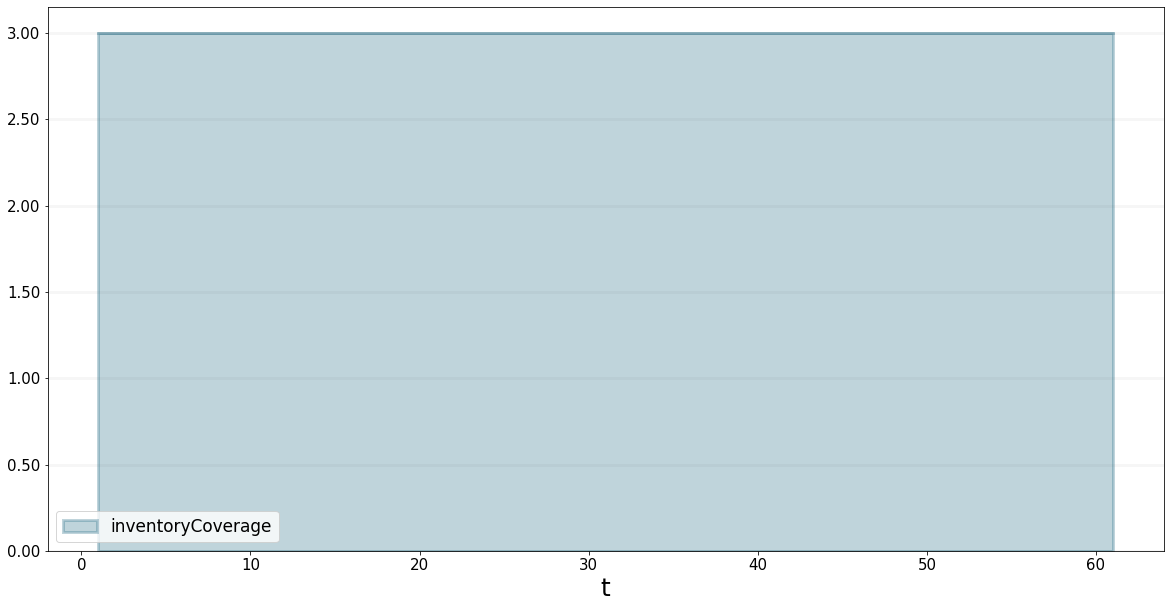

In [17]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base"], 
            equations=["inventoryCoverage"]
            )

## Market Shock

Let's investigate what happens if there is a sudden increase in the underlying demand of 50% at timestep 10. Note that the increase in demand is _at the current level of pricing_.

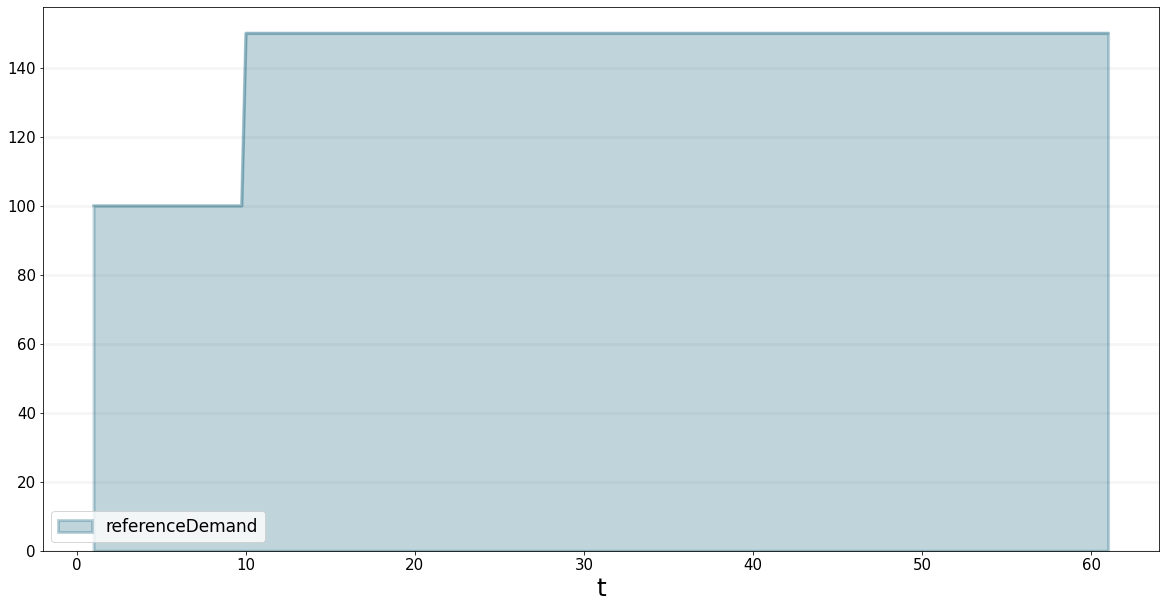

In [18]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["marketShock"], 
            equations=["referenceDemand"]
            )

The graph below shows how the actual demand and the inventory develops - as expected, there is an inital demand peak. But this causes the inventory to drop, which increases the price. The increase price leads to increased production, which then lowers the price and thus increases demand.

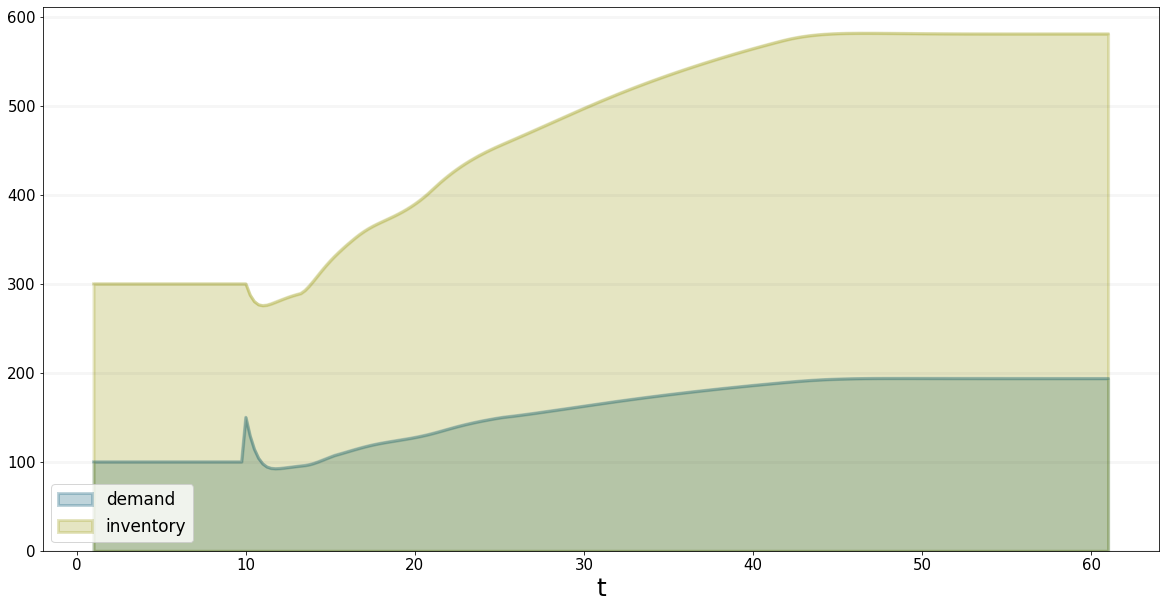

In [19]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["marketShock"], 
            equations=["demand", "inventory"]
            )

This is because the actual price affects the demand - if the price is higher then the reference price, demand drops, if the price is lower, demand increases compared to the reference demand.

The plot below shows how the dependency is quantified in this model using a non-linear function - the exact shape of this function will depend on your specific situation.

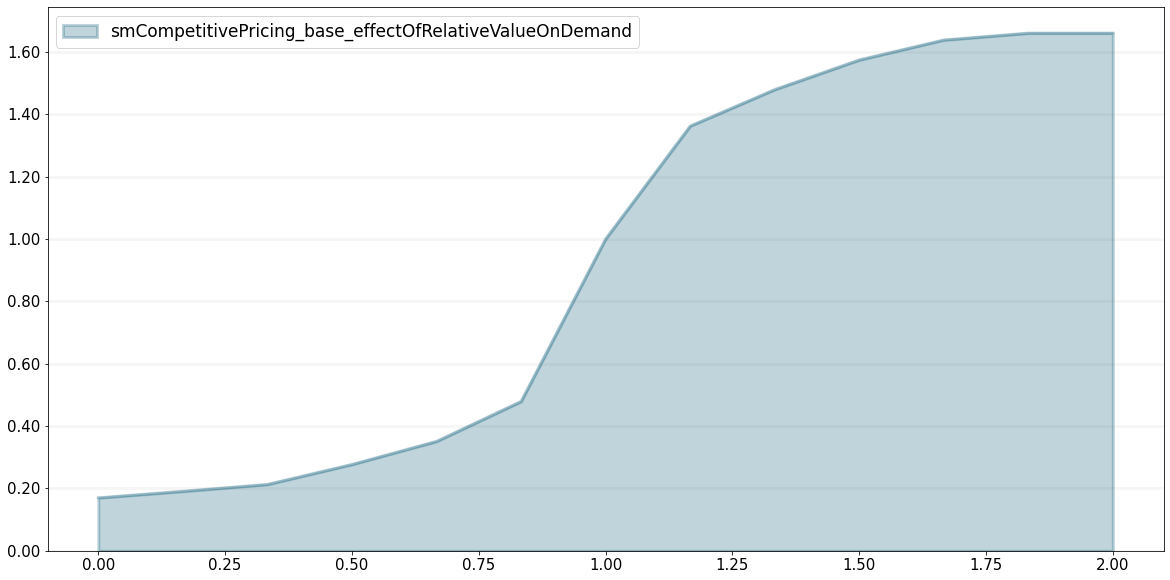

In [20]:
bptk.plot_lookup(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base"],
            lookup_names=["effectOfRelativeValueOnDemand"]
)

We also assume that prices are sensitive to the availability of the product. If the product becomes scare (i.e. the inventory coverage falls), prices go up, and vice versa. The dependency is modelled using the following table function:

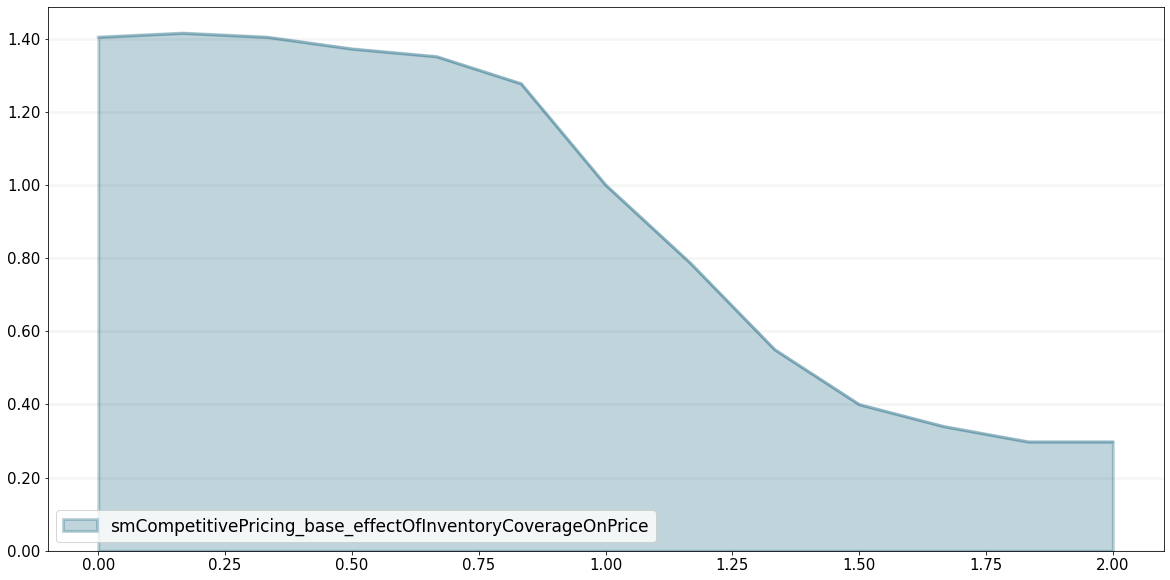

In [21]:
bptk.plot_lookup(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base"],
            lookup_names=["effectOfInventoryCoverageOnPrice"]
)

The production rate increases to a new, much higher level.

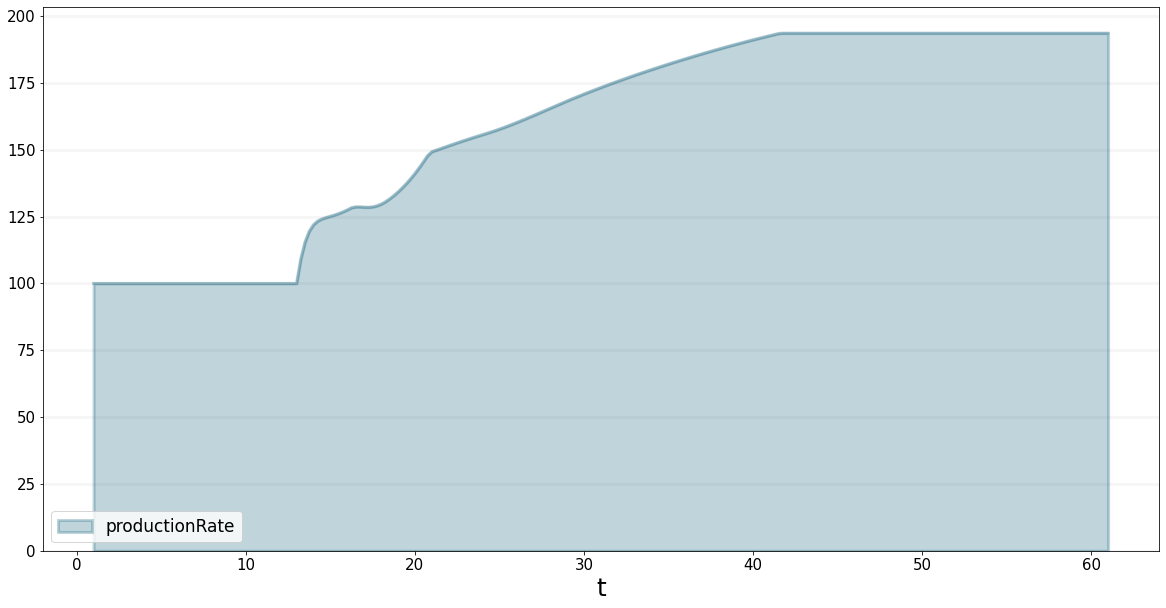

In [22]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["marketShock"], 
            equations=['productionRate']
            )

The price increases initially, because of the drop in inventory coverage. But the inventory coverage quickly recoveres due to increase production. Because inventory coverage influences the price, this leads to a price that is actually lower than the original price, but also to a demand that is higher than that indicated by the initial market shock.

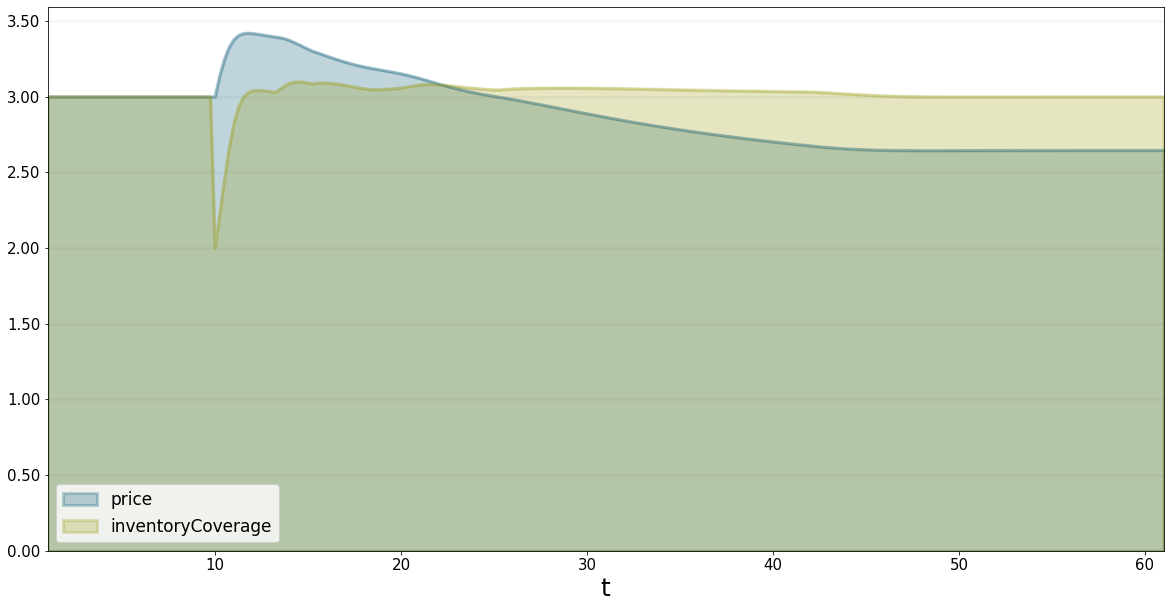

In [33]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["marketShock"], 
            equations=['price','inventoryCoverage']
            )

even though the overall demand incrase is only at around 75%, our profits more than double, as seen in the graph below.

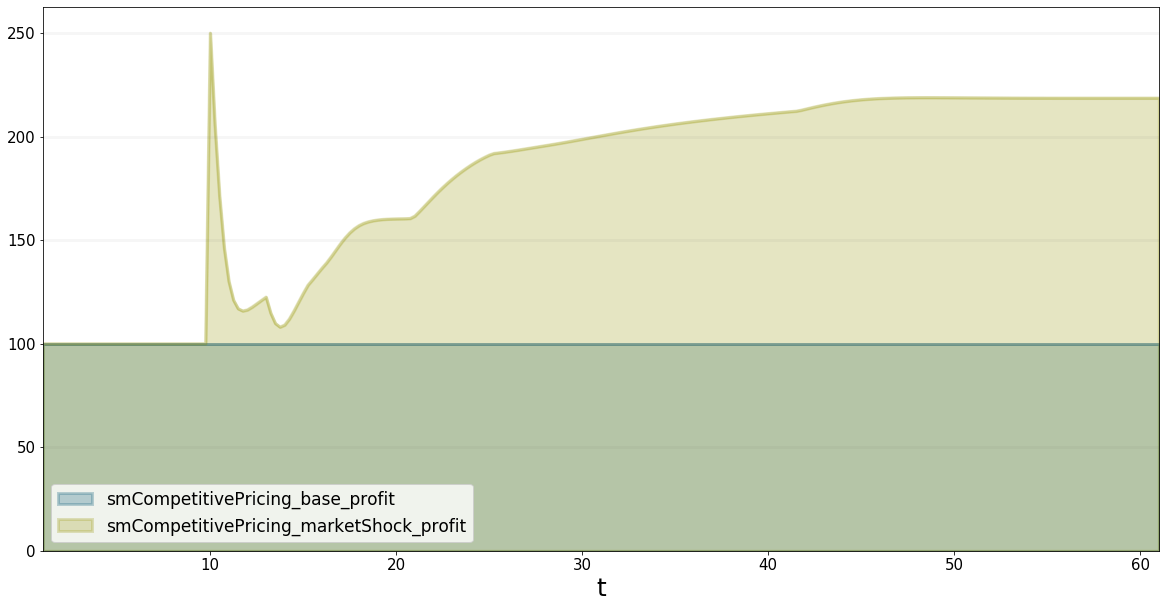

In [34]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base","marketShock"], 
            equations=['profit']
            )

This is because we are utilizing our production capacity better: we go from a utilization of 50% to a utilization above 90%, as seen in the graph below.

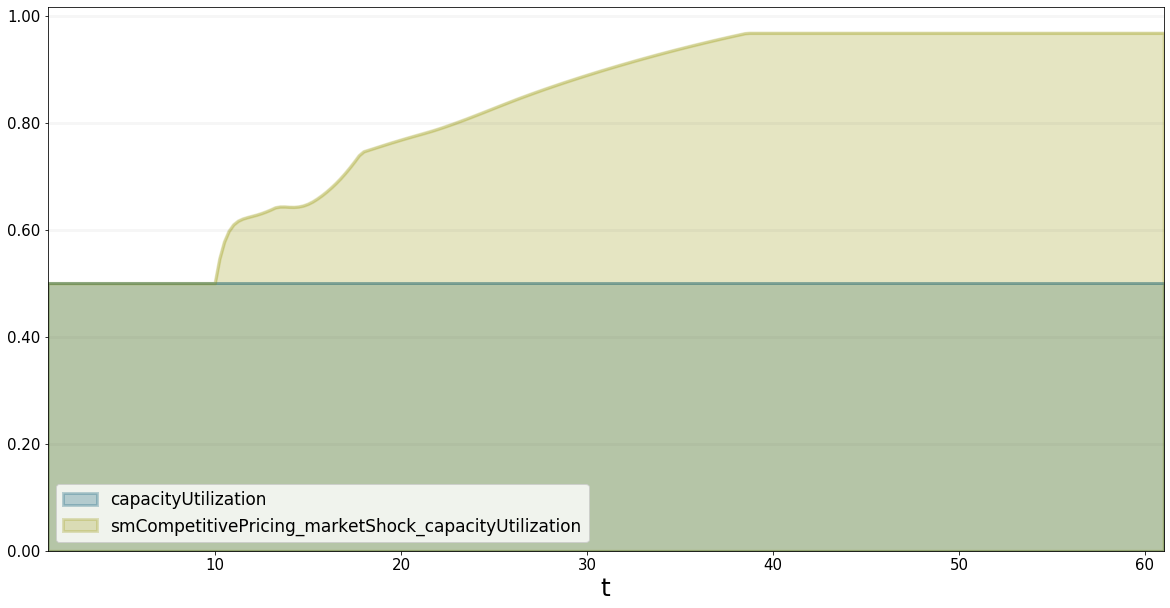

In [35]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base","marketShock"], 
            equations=['capacityUtilization']
            )

The figures above show that with the given shock of a 50% increase in underlying demand, we get close to our capacity limits.

# Stock and Flow Model

Now that we have a conceptual understanding of the key dynamics and have investigated some scenarios, we can investigate the underlying stock and flow model.

The following stock and flow diagram is a generic, quantitative, competitive pricing model. It works with relative values as far as possible, so only a few numbers have to be adjusted to adapt the model to a real-life situation.

The model consists of six parts:

* Production and inventory
* Demand formation
* Price adjustment
* Profit
* Perceived Inventory
* Expected Profitability


## Production and Inventory

![Commodity Pricing Dynamics](images/competitive_pricing_model_1.svg)

Production and inventory are determined by a simple stock and flow structure: production starts at a rate defined by `productionStartRate`. It takes a fixed amount of time to create a finished product, defined by the `productionTime`:

```
productionRate = DELAY(productionStartRate, productionTime)
productionTime = 3
```



The `productionStartRate` depends on our capacity and how we utilize it:

```
productionStartRate = productionCapacity*capacityUtilization
```

The `consumptionRate` determines how quickly stock is depleted, it is equal to the demand but cnostraint by inventory:

```
consumptionRate=MIN(demand, inventory)`
```

The inventory coverage is a useful measure of how much stock we have:

```
inventoryCoverage=Inventory/consumptionRate
```

How we set our `capacityUtilization` depends in a non-linear way on our expected profitability, which we normalize relative to the base case value:

```
capacityUtilization=
    effectOfProfitabilityOnCapacityUtilization(normalizedExpectedProfitability)
```

## Demand Formation

![Commodity Pricing Dynamics](images/competitive_pricing_model_4.svg)

The demand is calculated quite simply as the effect of the relative of a product on demand times a reference demand:


```
demand = effectOfRelativeValueOnDemand * referenceDemand
```

The reference demand is determined externaly (i.e. it is on the model boundary). In the base case we set `referenceDemand=100`, in the market shock scenario there `referenceDemand` increased to 150 at time 10.

The relative value of the product is calculated as:

```
relativeValueOfProduct = priceOfSubstitutes/price
```

## Price Adjustment

![Commodity Pricing Dynamics](images/competitive_pricing_model_2.svg)

The price is equal to the exponential average of the indicated price (the expected price) multiplied by the effect of the perceived inventory coverage on the price.

```
price = effectOfInventoryCoverageOnPrice * expectedPrice
```

The expected price is calculated as follows:

```
expectPrice(0) = indicatedPrice(0)
expectedPrice(t) = expectedPrice(t-1)+changeInExpectedPrice(t-1)
changeInExpectedPrice = (indicatedPrice-expectedPrice)/priceAdjustmentTime
indicatedPrice = MAX(minimumPrice,price)
priceAdjustmentTime = 3
```

## Profit

![Commodity Pricing Dynamics](images/competitive_pricing_model_6.svg)

This part of the model simply calculates the profit per time unit based on revenue and costs.

```
profit = revenue-cost
```

The revenue itself is simply the product of `price` and `consumptionRate`:

```
revenue = price*consumptionRate
```

The `cost` is then calculated as

```
cost = capacityCost + variableCost
```

The `capacityCost` is actually a constant, because`productionCapacity` is constant:

```
capacityCost = productionCapacity*unitCapacityCost
productionCapacity = 200
unitCapacityCost = 0.5
```

The `variableCost` changes with the `productionRate`:

```
variableCost = productionRate * unitVariableCost
unitVariableCost = 1
```

## Perceived Inventory Coverage

![Commodity Pricing Dynamics](images/competitive_pricing_model_3.svg)

As we saw above, our price setting mechanism depends on the (perceived) inventory coverage. This is calculated as the expontential average of the inventory coverage itself, averaged over a time define by `inventoryCoveragePerceptionTime`:

```
perceivedInventoryCoverage(0) = inventoryCoverage(0)
    perceivedInventoryCoverage(t-1)+changeInPerceivedInventoryCoverage(t-1)
changeInPerceivedInventoryCoverage = 
    (inventoryCoverage-perceivedInventoryCoverage)/inventoryCoveragePerceptionTime
inventoryCoveragePerceptionTime=3
```

It is important to work with perceived values and not actual values here, because in reality there is always a time lag between reality and our measurement of it. In practice exponential smoothing has proven to be a useful approach to modeling such measurements, because exponential averaging puts more weight on recent values but also takes distant values into account (as compared to creating a running average, which ignores any past values outside of a fixed timebox).

## Expected Profitability

![Commodity Pricing Dynamics](images/competitive_pricing_model_5.svg)

This is a similar situation compared to the inventory coverage - companies don't make decisions based on actual profits but on their profit projections:

``` 
expectedProfitability(0) = profit(0) 
expectedProfitability(t) = expectedProfitability(t-1)+changeInExpectedProfitability(t-1)
changeInExpectedProfitability =  (profit-expectedProfitability)/profitAdjustmentTime
profitAdjustmentTime=12
```